In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("BIKE DETAILS.csv")

In [3]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [5]:
# What is the range of selling prices in the dataset?

Range = df['selling_price'].max() - df['selling_price'].min()
Range

755000

In [6]:
# What is the median selling price for bikes in the dataset?
df["selling_price"].median()

45000.0

In [7]:
# What is the most common seller type?
most_common_seller_type = df["seller_type"].mode()[0]
# mode is use to check the most frequent value

In [8]:
# How many bikes have driven more than 50,000 kilometers ?
len(df[df["km_driven"] > 50000])

170

In [9]:
# What is the average km_driven value for each ownership type?
df.groupby(["owner"])["km_driven"].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [10]:
# What proportion of bikes are from the year 2015 or older?
(len(df[df["year"] >= 2015]) / len(df))*100

52.780395852968894

In [11]:
#  What is the trend of missing values across the datasetD
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [12]:
# What is the highest ex_showroom_price recorded, and for which bike?
df[df["ex_showroom_price"] == df["ex_showroom_price"].max()]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [15]:
# What is the total number of bikes listed by each seller typeD
df.groupby(["seller_type"])["name"].count()

,name
seller_type,
Dealer,6
Individual,1055


In [16]:
df.groupby(["selling_price"])["km_driven"].count().sort_values(ascending=False)

,km_driven
selling_price,
25000,77
35000,66
40000,63
50000,63
30000,62
...,...
47999,1
39000,1
36999,1


In [17]:
#  Identify and remove outliers in the km_driven column using the IQR methodB
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
IQR

29500.0

<Axes: xlabel='year'>

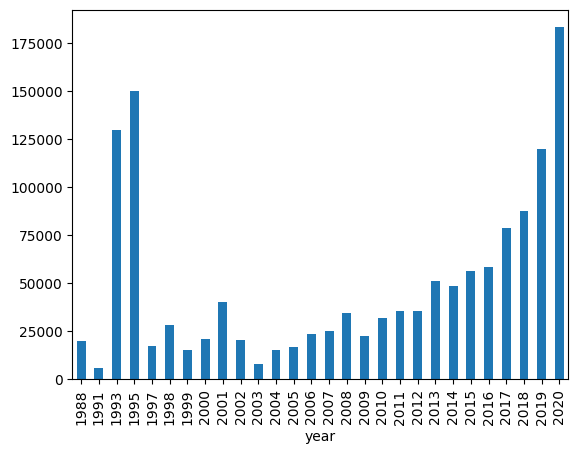

In [18]:
# Perform a bivariate analysis to visualize the relationship between year and selling_priceB
df.groupby(["year"])["selling_price"].mean().plot(kind="bar")

In [19]:
# What is the average depreciation in selling price based on the bike's age (current year - manufacturing YEAR ?
df["depreciation"] = df["selling_price"] - df["ex_showroom_price"]
df["depreciation"].mean()

-28513.549520766774

In [20]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,depreciation
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,1886.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,-24643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,NaN
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,-35000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,-35000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,-42000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,-46000.0


In [23]:
# Which bike names are priced significantly above the average price for their manufacturing year?
avg_price = df.groupby('year')['selling_price'].mean().reset_index()
avg_price.rename(columns={'selling_price':'avg_selling_price'}, inplace=True)


df_bike = pd.merge(df, avg_price, on='year')
df_bike[df['selling_price']>df_bike['avg_selling_price']]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,depreciation,avg_selling_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,NaN,119689.511628
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,1886.0,87660.374046
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,-24643.0,56500.000000
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,NaN,34289.285714
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,13320.0,119689.511628
...,...,...,...,...,...,...,...,...,...
1004,Bajaj Pulsar NS 200,60000,2016,Individual,1st owner,25000,99000.0,-39000.0,58469.018692
1005,TVS Apache RTR 160,60000,2014,Individual,1st owner,19000,81000.0,-21000.0,48668.131868
1008,Bajaj Pulsar 220 F,52000,2012,Individual,1st owner,45000,94000.0,-42000.0,35748.400000
1012,Bajaj Pulsar NS 200,50000,2014,Individual,1st owner,13000,99000.0,-49000.0,48668.131868


Text(0.5, 1.0, 'Correlation Matrix')

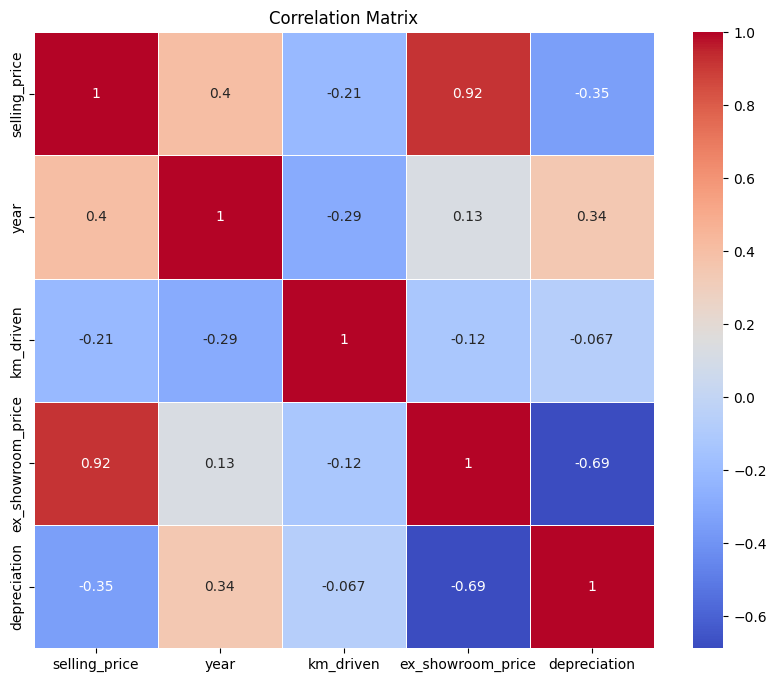

In [22]:
#  Develop a correlation matrix for numeric columns and visualize it using a heatmap.

numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
corr_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')